In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import math

In [2]:
def linear_model(x, a, b):
    return a * x + b

# use self defined stdev function because the numpy one calculates population std
def stdev(array):
    if len(array) <= 1:
        return None
    mean = np.average(array)
    sum_array = (array - mean)**2
    return math.sqrt(sum(sum_array)/(len(array)-1))

In [3]:
# Exercise 1, calculating wavelength of Na light source
# angles in degrees
d = 0.0254 / 2500 # 2500 per inch, so 2500 per 0.0254 m
dm_0 = 169 + 0.5 + 12/60 # 12 minutes
dm_p1 = 173 + 8/60 # 8 minutes
dm_p2 = 176 + 0.5 + 7/60
dm_n1 = 166 + 21/60
dm_n2 = 162 + 0.5 + 25/60

# convert these to radians
dm_0 = np.deg2rad(dm_0)
dm_p1 = np.deg2rad(dm_p1)
dm_p2 = np.deg2rad(dm_p2)
dm_n1 = np.deg2rad(dm_n1)
dm_n2 = np.deg2rad(dm_n2)

In [4]:
# calculate respective lambda values
lambda_p1 = d * np.sin(np.abs(dm_p1 - dm_0)) / 1
lambda_p2 = d * np.sin(np.abs(dm_p2 - dm_0)) / 2
lambda_n1 = d * np.sin(np.abs(dm_n1 - dm_0)) / 1
lambda_n2 = d * np.sin(np.abs(dm_n2 - dm_0)) / 2

lambda_arr = np.array([lambda_n1, lambda_n2, lambda_p1, lambda_p2])

lambda_ave = np.average(lambda_arr)
u_lambda_ave = stdev(lambda_arr)
print('The wavelength of the sodium light source is', lambda_ave, '±', u_lambda_ave, 'm')

The wavelength of the sodium light source is 6.03485474925509e-07 ± 8.182816816911318e-09 m


In [5]:
freq, at_0, at_n2, at_p2 = np.loadtxt('freq_water_diffraction.txt', skiprows=1, unpack=True)

In [6]:
angles_n2 = at_0 - at_n2
angles_p2 = at_p2 - at_0
angles = (angles_n2 + angles_p2) / 2
u_angles = np.sqrt((1/angles_n2)**2 + (1/angles_p2)**2)
# convert minutes to radians
angles = np.deg2rad(angles/60)
u_angles = np.deg2rad(u_angles/60)
d_water = 2 * lambda_ave / np.sin(angles)
ud_water = d_water * np.sqrt((u_lambda_ave/lambda_ave)**2 + (u_angles/angles)**2)

for i in range(len(freq)):
    print('Wavelength of sound at frequency', freq[i], 'MHz is', d_water[i], '±', ud_water[i], 'm')

Wavelength of sound at frequency 2.0 MHz is 0.0009220581489383921 ± 6.678134293462157e-05 m
Wavelength of sound at frequency 1.824 MHz is 0.0008298523896344005 ± 4.8273259950935394e-05 m
Wavelength of sound at frequency 1.902 MHz is 0.0008298523896344005 ± 4.8273259950935394e-05 m
Wavelength of sound at frequency 1.954 MHz is 0.0009220581489383921 ± 6.678134293462157e-05 m
Wavelength of sound at frequency 2.019 MHz is 0.0007544113191598336 ± 3.714616876976114e-05 m
Wavelength of sound at frequency 1.905 MHz is 0.0010373153553828408 ± 0.00010178541890236104 m
Wavelength of sound at frequency 1.836 MHz is 0.0009220581489383921 ± 6.678134293462157e-05 m
Wavelength of sound at frequency 1.835 MHz is 0.0011855032005993688 ± 0.00018311064205979823 m


The speed of the sound wave is 1594.7172953394584 ± 972.3725825315945 m/s


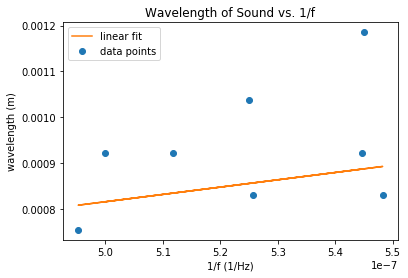

In [7]:
lof_popt, lof_pcov = curve_fit(linear_model, 1/(freq * 10**6), d_water, sigma=ud_water, absolute_sigma=True)

lof_a = lof_popt[0]
lof_b = lof_popt[1]
lof_pvar = np.diag(lof_pcov)
lof_stdev = np.sqrt(lof_pvar)

lof_y = linear_model(1/(freq * 10**6), lof_a, lof_b)

plt.errorbar(1/(freq * 10**6), d_water, marker='o', fmt='.', label='data points')
plt.plot(1/(freq * 10**6), lof_y, label='linear fit')
plt.title('Wavelength of Sound vs. 1/f')
plt.xlabel('1/f (1/Hz)')
plt.ylabel('wavelength (m)')
plt.legend()

print('The speed of the sound wave is', lof_a, '±', lof_stdev[0], 'm/s')

In [8]:
upper_n = 8
lower_n = 2
degrees_of_freedom = upper_n - lower_n

chi_squared_lof = (1 / degrees_of_freedom) * sum(((d_water[: degrees_of_freedom] - lof_y[: degrees_of_freedom])\
                                            / ud_water[: degrees_of_freedom])**2)

print("The chi squared value we got for the fit is", str(chi_squared_lof))

The chi squared value we got for the fit is 1.9254422755860778
